# Домашнее задание №2 «Проектное задание»
*Выполнили: Аллахвердиева Лейла Исмайыловна, Щербаков Матвей Андреевич*

## 1. Название задания

## *Кратчайшиe пути*

## 2. Алгоритм

### 2.1 Псевдокод алгоритма

```
1. Алгоритм dijkstra_fast
2.     queue <- пустая куча
3.     distance <- [∞] * |graph.adjencency_lists|
4.     pi <- [None] * |graph.adjencency_lists|
5.     max_weight <- вес максимального ребра графа + 1
6.     для каждого i <- 0 из |graph.adjencency_lists| делай
7.         в queue добавить (i, max_weight)
8.     изменить приоритет queue для start на 0
9.     distances[start] <- 0
10.    pi[start] <- 0
11.    пока |queue| > 0 делай
12.        current <-  минимальный элемент в queue
13.        для каждого neighnor в graph.neighbors(current) делай 
14.            new_distance <- distance[current] + graph.weight(current, neighbor)
15.            если neighbor в queue.heap_index и new_distance < queue.get_priority(neighbor) тогда 
16.                изменить приоритет queue для neighbor на distances[current] + graph.weight(current, neighbor)
17.                distances[neighbor] <- new_distance
18.                pi[neighbor] <- current
19.    вернуть distances

20.Алгоритм dijkstra_slow
21.    n <- |graph.adjencency_lists|
22.    dist <- [inf] * n
23.    dist[start] <- 0
24.    visited <- пустое множество
25.    пока |visited|  <  n делай
26.        u <- -1
27.        для i <- 0 до n делай 
28.            если i не входит в visited и (u = -1 или dist[i]  < dist[u]) тогда
29.                u <- i
30.        если dist[u] = -1 тогда
31.            остановить
32.        в visited добавить u
33.        для каждой v из graph.neighbors(u) делай
34.            w <- вес ребра (u, v)
35.            если dist[v]  = -1 или dist[u] + w  < dist[v] тогда
36.                dist[v] <- dist[u] + w
37.    вернуть dist
```

### 2.2 Описание работы алгоритма

>**<1-2>** Создаем объект очереди приоритетов Heap.  
>**<3-4>** Инициализируем массив distances, который будет хранить расстояния от стартовой вершины до каждой вершины графа, и массив pi, который будет хранить родителя.  
>**<5>** Вычисляем максимальный вес ребра в графе и добавляем к нему 1. Это нужно для того, чтобы при инициализации очереди приоритетов все вершины имели максимальный приоритет (т.е. были недостижимы из стартовой вершины).  
>**<6-8>** Инициализируем очередь приоритетов, добавляя все вершины графа с максимальным приоритетом и устанавливая приоритет стартовой вершины равным 0  
>**<9-10>** Устанавливаем расстояние от стартовой вершины до неё самой равным 0 и предыдущую вершину на пути до неё самой равной 0.  
>**<11-19>** Запускаем цикл, который будет продолжаться, пока очередь приоритетов не опустеет. На каждой итерации выбираем вершину с наименьшим приоритетом (расстоянием от стартовой вершины), которая еще не была посещена. Для каждой соседней вершины вычисляем новое расстояние от стартовой вершины через текущую вершину. Если это расстояние меньше, чем текущее расстояние до соседней вершины, то обновляем расстояние до неё, устанавливаем предыдущую вершину на пути до неё и меняем приоритет в очереди приоритетов на новое значение. После обработки всех соседних вершин текущей вершины, мы переходим к следующей вершине с наименьшим приоритетом в очереди.   
>**<20>** Возвращаем массив distances с расстояниями от стартовой вершины до всех остальных вершин графа.  
**<20-23>** Инициализируем массив dist, который будет хранить расстояния от стартовой вершины до каждой вершины графа. Устанавливаем расстояние до стартовой вершины равным 0.   
**<24-25>** Создаем множество visited, которое будет хранить посещенные вершины.   
**<26-30>** Запускаем цикл, который будет продолжаться, пока все вершины не будут посещены. На каждой итерации выбираем вершину с наименьшим расстоянием из start, которая еще не была посещена.   
**<33-36>** Для каждой соседней вершины v текущей вершины u вычисляем вес w ребра (расстояние между вершинами). Если расстояние от стартовой вершины до v не определено или расстояние через текущую вершину меньше, то обновляем расстояние до v.  
**<37>** Возвращаем массив dist с расстояниями от стартовой вершины до всех остальных вершин графа.

### 2.3 Оценка времени работы

Сложность функции dijkstra_slow составляет O(n^2), где n - количество вершин в графе. Алгоритм использует два вложенных цикла по всем вершинам графа, что приводит к квадратичной сложности.  
Сложность функции dijkstra_fast составляет O(m log n), где n - количество вершин в графе, а m - количество ребер. Алгоритм использует структуру данных Heap для хранения вершин с их приоритетами, что позволяет быстро находить ближайшую вершину.

## 3. Реализация

### 3.1 Код на языке Python

0.0025149999999030115
0.0028829999999970823


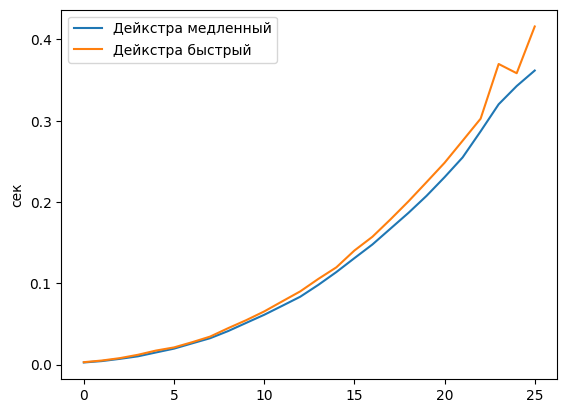

In [30]:
from math import inf

#Матвей
class Graph:
    def __init__(self, adjencency_lists: list[list[int]], weights: dict[tuple[int, int], int]):
        """
        Просто присваиваем 😕
        """
        self.adjencency_lists = adjencency_lists
        self.weights = weights

    def neighbors(self, v: int) -> list[int]:
        """
        Возвращает список соседей вершины v
        """
        return self.adjencency_lists[v]

    def weight(self, u: int, v: int) -> int:
        """
        Возвращает вес ребра (u, v)
        """
        return self.weights[(u, v) if (u, v) in self.weights else (v, u)]


# Матвей, взято из степика
class HeapItem:
    def __init__(self, v, p):
        self.v = v  # идентификатор вершины
        self.priority = p  # приоритет (то, что и хранилось в куче в упражнении 10.9)


class Heap:
    def __init__(self):
        # массив heap_index индексируется идентификаторами вершин и будет хранить позицию
        # соответствующей вершины в массиве heap. Необходим для константной реализации
        # операции получения приоритета вершины
        self.heap_index = dict()  # по идентификатору вершины - индекс в heap
        self.heap: list[HeapItem] = []

    def __len__(self):
        return len(self.heap)

    def left_son(self, p):
        # возвращаем индекс левого сына элемента p
        return 2 * p + 1

    def right_son(self, p):
        # возвращаем индекс правого сына элемента p
        return 2 * p + 2

    def parent(self, p):
        # возвращаем индекс родителя элемента p (не забудьте про сложности округления
        # и целочисленного деления в Питоне! протестируйте свой метод!)
        return max(0, (p - 1) // 2)

    def min_son(self, p):
        # возвращаем индекс минимального сына элемента p или -1, если p - лист
        l_son_ind = self.left_son(p)
        if l_son_ind > len(self.heap) - 1: return -1
        r_son_ind = self.right_son(p)
        if r_son_ind > len(self.heap) - 1: return l_son_ind
        if self.heap[l_son_ind].priority < self.heap[r_son_ind].priority:
            return l_son_ind
        else:
            return r_son_ind

    def sift_up(self, p):
        if p == 0: return

        prnt = self.parent(p)
        # пока мы не в корне и текущий элемент меньше родительского, меняем их и поднимаемся выше
        while self.heap[prnt].priority > self.heap[p].priority:
            self.heap_index[self.heap[prnt].v], self.heap_index[self.heap[p].v] = self.heap_index[self.heap[p].v], \
                self.heap_index[self.heap[prnt].v]
            self.heap[prnt], self.heap[p] = self.heap[p], self.heap[prnt]
            p = prnt
            prnt = self.parent(p)

    def sift_down(self, p):
        # 1. учитывать, что в heap хранятся HeapItem
        # 2. когда меняются местами два элемента кучи, обновить значения heap_index для соответствующих вершин
        minCh = self.min_son(p)
        # пока мы не в листе и текущий элемент больше минимального из сыновей,
        # меняем их местами и погружаемся ниже
        while minCh > 0 and self.heap[minCh].priority < self.heap[p].priority:
            self.heap_index[self.heap[minCh].v], self.heap_index[self.heap[p].v] = self.heap_index[self.heap[p].v], \
                self.heap_index[self.heap[minCh].v]
            self.heap[minCh], self.heap[p] = self.heap[p], self.heap[minCh]
            p = minCh
            minCh = self.min_son(p)

    # метод, изменяющий приоритет вершины v на новый, и выполняющий всплытие или погружение
    def change_priority(self, v, new_priority):
        # если новый приоритет больше, записываем его и делаем погружение
        current = self.heap[self.heap_index[v]]
        if new_priority > current.priority:
            current.priority = new_priority
            self.sift_down(self.heap_index[current.v])
        else:
            current.priority = new_priority
            self.sift_up(self.heap_index[current.v])

    def add(self, v, priority):
        # скопируйте код данного метода и внесите изменения, чтобы:
        # 1. учитывать, что в heap хранятся HeapItem
        # 2. добавлять корректное значение для новой вершины в heap_index
        self.heap.append(HeapItem(v, priority))
        self.heap_index[v] = len(self.heap) - 1
        self.sift_up(len(self.heap) - 1)

    # новый метод для нашей задачи, который кладет в очередь N вершин графа с идентификаторами от 0 по N-1
    # и приоритетом "бесконечность" (в качестве "бесконечности" можно выбрать любое число большее N)
    def add_vertices(self, N):
        for i in range(N):
            self.add(i, inf)

    # новый метод - возвращает приоритет вершины v, используя heap_index для нахождения v в куче
    def get_priority(self, v):
        return self.heap[self.heap_index[v]].priority

    def min(self):
        if len(self.heap) - 1 == -1: raise IndexError("Куча пуста!")
        return self.heap[0].v

    def get_min(self):
        result = self.min()
        self.heap_index.pop(result)
        self.heap[0] = self.heap[len(self.heap) - 1]
        self.heap_index[self.heap[0].v] = 0
        self.heap.pop()
        if len(self.heap) - 1 > 0:
            self.sift_down(0)
        return result

#Лейла
def make_graph() -> Graph:
    """
    Читаем граф из файла, заполняем списки смежности и словарь весов
    """
    adjencency_lists = [[] for _ in range(200)]
    weights = {}
    with open('dijkstraData.txt', 'r') as file:
        for i, line in enumerate(file.readlines()):
            nodes_data = line.strip().split('\t')
            for j in range(1, len(nodes_data)):
                neighbor, weight = map(int, nodes_data[j].split(','))
                adjencency_lists[i].append(neighbor - 1)
                weights[(i, neighbor - 1)] = weight
    return Graph(adjencency_lists, weights)


# Лейла
# генератор случайных нагруженных графов (подзадача 2)
def make_random_graph(n: int, m: int) -> Graph:
    import random
    weights = {}
    V = {i for i in range(n)}
    adjencency_lists = [[] for i in range(n)]
    for i in V:
        for j in V:
            if i != j:
                if random.randint(0, 1) < 0.5:
                    adjencency_lists[i].append(j)
                    adjencency_lists[j].append(i)
                    c = random.randint(1, 100)
                    weights[(i, j)] = c
                    weights[(j, i)] = c

    return Graph(adjencency_lists, weights)


# Лейла
def dijkstra_slow(graph: Graph, start: int) -> list[int]:
    n = len(graph.adjencency_lists)
    dist = [inf] * n
    dist[start] = 0
    visited = set()
    while len(visited) < n:
        u = -1
        for i in range(n):
            if i not in visited and (u == -1 or dist[i] < dist[u]):
                u = i
        if dist[u] == -1:
            break
        visited.add(u)
        for v in graph.neighbors(u):
            w = graph.weight(u, v)
            if dist[v] == -1 or dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
    return dist


# Матвей
def dijkstra_fast(graph: Graph, start: int) -> list[int]:
    queue = Heap()
    distances = [inf] * len(graph.adjencency_lists)
    pi = [None] * len(graph.adjencency_lists)

    max_weight = max(graph.weights.values()) + 1
    for i in range(len(graph.adjencency_lists)):
        queue.add(i, max_weight)

    queue.change_priority(start, 0)
    distances[start] = 0
    pi[start] = 0

    while len(queue) > 0:
        current = queue.get_min()

        for neighbor in graph.neighbors(current):
            new_distance = distances[current] + graph.weight(current, neighbor)
            if neighbor in queue.heap_index and new_distance < queue.get_priority(neighbor):
                queue.change_priority(neighbor, distances[current] + graph.weight(current, neighbor))
                distances[neighbor] = new_distance
                pi[neighbor] = current

    return distances


def measure(func, *args):
    import time
    start = time.process_time()
    func(*args)
    return time.process_time() - start


# Матвей, Лейла
if __name__ == '__main__':
    graph = make_graph()
    start = 0
    distances_slow = dijkstra_slow(graph, start)
    distances_fast = dijkstra_fast(graph, start)

    print(distances_slow)
    print(distances_fast)
    assert distances_slow == distances_fast

    # measuring
    from matplotlib import pyplot as plt

    A = 100
    B = 1000
    step = 10

    result: list[tuple[float, float]] = []
    for n in range(A, B, step):
        test_graph = make_random_graph(n, 0)
        t1 = measure(dijkstra_slow, test_graph, 0)
        t2 = measure(dijkstra_fast, test_graph, 0)
        result.append((t1, t2))

    plt.plot([x[0] for x in result], label='Дейкстра медленный')
    plt.plot([x[1] for x in result], label='Дейкстра быстрый')
    # с помощью ylabel задается подпись оси ординат
    plt.ylabel('сек')
    # команда legend печатает легенду с названиями всех графиков
    plt.legend()
    # команда show рисует получившийся график
    plt.show()


### 3.2 Примеры работы алгоритма

In [ ]:
# Вызовите несколько раз ваш алгоритм на различных примерах входных данных